# Setup

## Loading Data

In [1]:
from Bio import Entrez
import pandas as pd
import json # for pretty printing

import re 
import os
import json
import pandas as pd
#import pprint
import seaborn as sns
import numpy as np 
from collections import Counter 
from matplotlib import pyplot as plt
#import statistics
import gc
import plotly.express as px
#from IPython.display import clear_output

import multiprocessing
#from functools import partial
from multiprocessing import  Pool

#from pandarallel import pandarallel

import swifter
# from swifter import set_defaults
# cores = multiprocessing.cpu_count()
# num_process = cores
# set_defaults(
#     npartitions=cores,
#     dask_threshold=1,
#     scheduler="processes",
#     progress_bar=True,
#     progress_bar_desc=None,
#     allow_dask_on_strings=False,
#     force_parallel=False,
# )

from tqdm import tqdm, tqdm_pandas

# nlp
from num2words import num2words

#import string

#from bs4 import BeautifulSoup 
#import time

from textblob import TextBlob

#from pygments import highlight
#from pygments.lexers import get_lexer_by_name
#from pygments.formatters import HtmlFormatter
#from pygments.lexers import guess_lexer

#import emoji
#import demoji

import re
import contractions
#from contractions import contractions_dict

import nltk
from nltk.tokenize import word_tokenize 
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
#nltk.download('wordnet')
from nltk.corpus import stopwords
#import gensim
#from gensim.utils import simple_preprocess
#import gensim.corpora as corpora

# nltk.download('averaged_perceptron_tagger')
# nltk.download('tagsets')
# nltk.download('universal_tagset')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giorg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\giorg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [70]:
import ast
def convert_list(x):
    lst = ast.literal_eval(x)
    return lst if len(lst[0]) > 0 else None
data=pd.read_csv("./Data/toxoplasma_gondii_pubmed.csv", converters={'Keyword List': convert_list, 
                                                                    'AuthorList': convert_list, 
                                                                    'PublicationTypeList': convert_list,
                                                                    'PreprocessedAbstract': ast.literal_eval})


In [79]:
data.head()

,pubmed_id,Title,Keyword List,Journal Name,Journal ISO,Journal Country,Abstract,ArticleDate,CompletedDate,RevisedDate,PublicationYear,Language,AuthorList,PublicationTypeList,PreprocessedAbstract
0,8579614,Purification and cloning of a soluble ATP-diph...,None,Biochemical and biophysical research communica...,Biochem Biophys Res Commun,United States,"A soluble ATP-diphosphohydrolase (apyrase, EC ...",NaN,1996/03/12,2007/11/14,1996.0,eng,"[Handa, M , Guidotti, G]","[Comparative Study , Journal Article , Resea...","[soluble, atp, diphosphohydrolase, apyrase, ec..."
1,769615,Mechanism of uptake of strontium isotopes in a...,None,The American review of respiratory disease,Am Rev Respir Dis,United States,Observations on experimental aspergillosis of ...,NaN,1976/06/02,2014/11/20,1976.0,eng,"[Rawal, BD , Adiseshan, N]",[Journal Article],"[observation, experimental, aspergillosis, cho..."
2,19147421,Multicenter study on the prevention of congeni...,None,Medicina,Medicina (B Aires),Argentina,Toxoplasmosis is an infection caused by Toxopl...,NaN,2009/11/16,2009/01/16,2008.0,spa,"[Carral, L , Kaufer, F , Durlach, R , Freul...","[English Abstract , Journal Article , Multic...","[toxoplasmosis, infection, caused, toxoplasma,..."
3,32820712,Modelling Toxoplasma gondii infection in human...,"[Cerebral organoid, Toxoplasma gondii, disease...",Emerging microbes & infections,Emerg Microbes Infect,United States,Pluripotent stem cell-derived cerebral organoi...,NaN,2021/04/21,2021/04/28,2020.0,eng,"[Seo, HH , Han, HW , Lee, SE , Hong, SH , ...",[Journal Article],"[pluripotent, stem, cell, derived, cerebral, o..."
4,30891398,Evidence of red panda as an intermediate host ...,"[China, Genotype, Isolation, Red panda (Ailuru...",International journal for parasitology. Parasi...,Int J Parasitol Parasites Wildl,England,<i>Toxoplasma gondii</i> has been found to inf...,2019/02/23,NaN,2020/10/01,2019.0,eng,"[Yang, Y , Dong, H , Su, R , Li, T , Jiang...",[Journal Article],"[toxoplasma, gondii, found, infect, almost, wa..."


In [167]:
data.shape

(17642, 15)

In [42]:
data.dtypes

pubmed_id                 int64
Title                    object
Keyword List             object
Journal Name             object
Journal ISO              object
Journal Country          object
Abstract                 object
ArticleDate              object
CompletedDate            object
RevisedDate              object
PublicationYear         float64
Language                 object
AuthorList               object
PublicationTypeList      object
PreprocessedAbstract     object
dtype: object

# Data Exploration: Descriptive Statistics

## Journals

Number of journals

In [80]:
len(grouped_data)

2172

Visualizing journals with a lot of published articles

In [81]:
# Conta le occorrenze di ogni journal name
journal_counts = data['Journal Name'].value_counts()

# Seleziona solo i primi 10 journal name più citati
top_journals = journal_counts[:10]

# Crea un nuovo DataFrame con solo i dati dei journal name più citati
data_top_journals = data[data['Journal Name'].isin(top_journals.index)]

grouped_data = data.groupby('Journal Name').size().reset_index(name='nArticles')
top_10 = grouped_data.nlargest(10, 'nArticles')

fig = px.treemap(top_10, path=['Journal Name'], color='Journal Name', color_continuous_scale='RdBu',title='Number of Articles by Journal Name')
fig.update_layout(width=600, height=600)
fig.update_traces(textfont_size=25, textinfo='label+text+value')
fig.show()

In [184]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_yticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_yticklabels(labels, rotation=0)

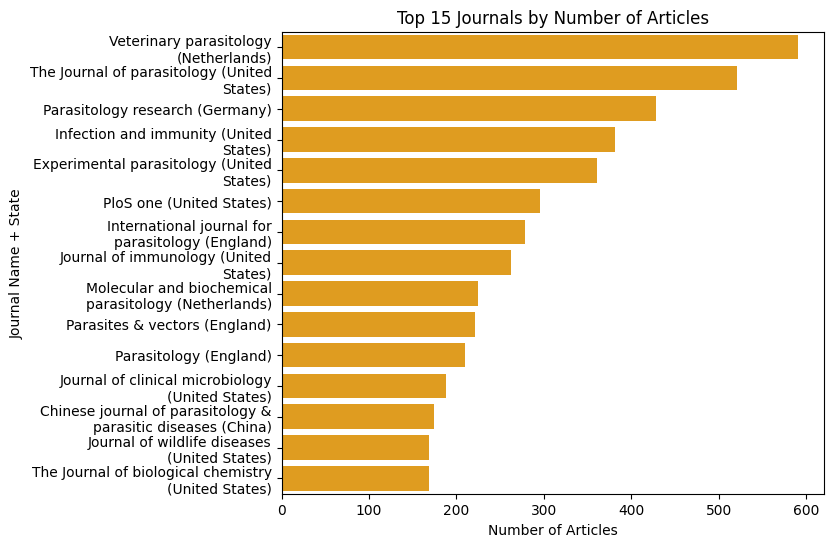

In [205]:
import seaborn as sns

# Create data
grouped_data = data.groupby(['Journal Name', 'Journal Country']).size().reset_index(name='nArticles')
grouped_data['Journal Name'] = grouped_data['Journal Name'].replace('Zhongguo ji sheng chong xue yu ji sheng chong bing za zhi = Chinese journal of parasitology & parasitic diseases', 'Chinese journal of parasitology & parasitic diseases')
grouped_data['Journal Name'] = grouped_data['Journal Name'].replace('Journal of immunology (Baltimore, Md. : 1950)', 'Journal of immunology')
grouped_data['Journal Name + State'] = grouped_data['Journal Name'] + " (" + grouped_data['Journal Country'] + ")"
top_10 = grouped_data.nlargest(15, 'nArticles')

# Create plot
plt.figure(figsize=(7, 6), facecolor=None)
ax = sns.barplot(x='nArticles', y='Journal Name + State', data=top_10, color='orange')
plt.title(f'Top 15 Journals by Number of Articles')
ax.set(xlabel='Number of Articles', ylabel='Journal Name + State')
wrap_labels(ax, 35)
plt.show()

Number of unique journals:

In [168]:
len(grouped_data)

2173

In [170]:
top_10

,Journal Name,Journal Country,nArticles,Journal Name + State
2072,Veterinary parasitology,Netherlands,591,Veterinary parasitology (Netherlands)
1928,The Journal of parasitology,United States,521,The Journal of parasitology (United States)
1591,Parasitology research,Germany,428,Parasitology research (Germany)
924,Infection and immunity,United States,382,Infection and immunity (United States)
732,Experimental parasitology,United States,361,Experimental parasitology (United States)
1640,PloS one,United States,296,PloS one (United States)
949,International journal for parasitology,England,278,International journal for parasitology (England)
1151,Journal of immunology,United States,263,Journal of immunology (United States)
1431,Molecular and biochemical parasitology,Netherlands,225,Molecular and biochemical parasitology (Nether...
1588,Parasites & vectors,England,221,Parasites & vectors (England)


## Countries

In [175]:
grouped_data_c

,Journal Country,nArticles
0,Algeria,7
1,Argentina,12
2,Australia,82
3,Austria,24
4,Bangladesh,5
...,...,...
82,United Arab Emirates,41
83,United States,5968
84,Uruguay,1
85,Venezuela,5


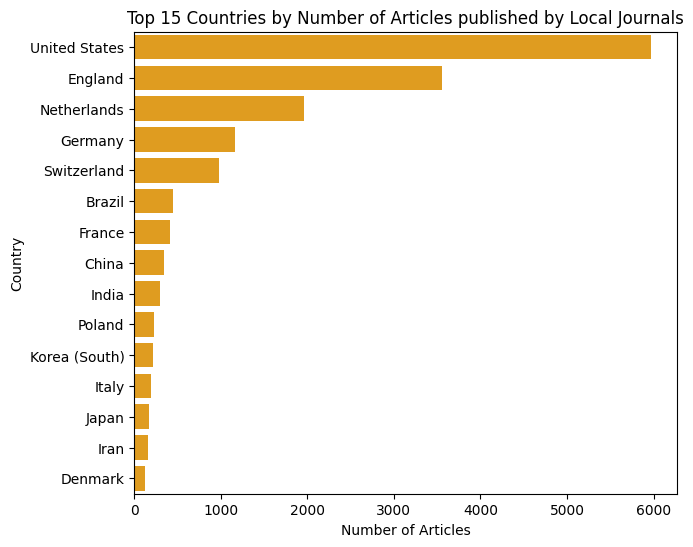

In [207]:
grouped_data_c = data.groupby(['Journal Country']).size().reset_index(name='nArticles')
top_10_c = grouped_data_c.nlargest(15, 'nArticles')

# Create plot
plt.figure(figsize=(7, 6), facecolor=None)
ax = sns.barplot(x='nArticles', y='Journal Country', data=top_10_c, color='orange')
plt.title(f'Top 15 Countries by Number of Articles published by Local Journals')
ax.set(xlabel='Number of Articles', ylabel='Country')
plt.show()

In [104]:
# Create data
country_counts = data['Journal Country'].value_counts().reset_index()
country_counts.columns = ['Journal Country', 'count']

# Create plot
fig = px.choropleth(country_counts, locations='Journal Country', color='count',
                    locationmode='country names', color_continuous_scale='Oranges',
                    title='Number of Articles by Country')
fig.show()

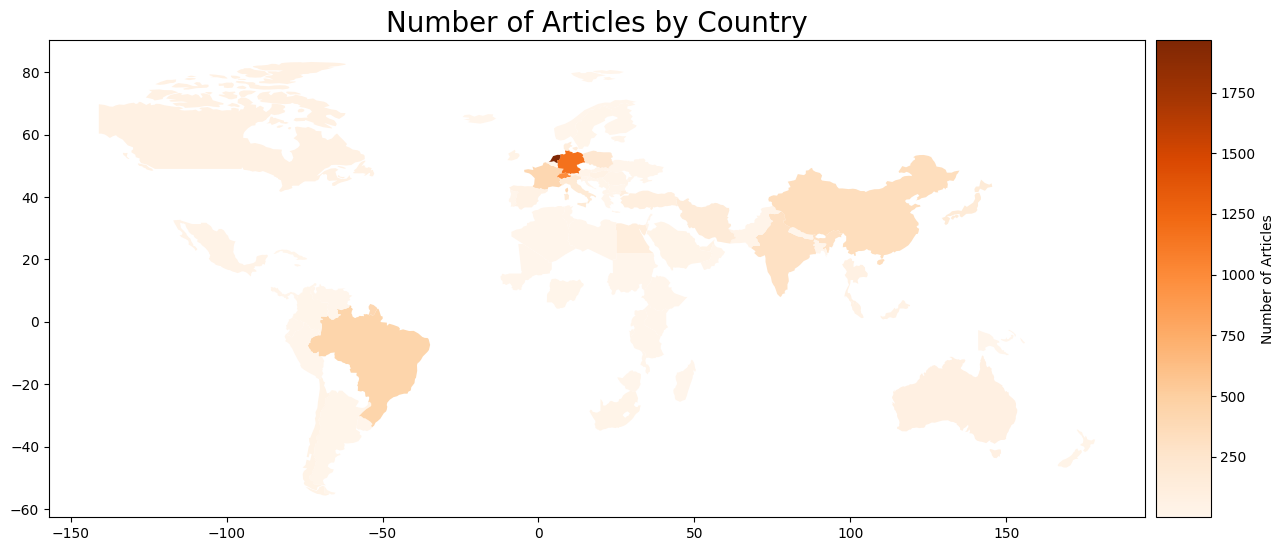

In [108]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create data
country_counts = data['Journal Country'].value_counts().reset_index()
country_counts.columns = ['name', 'count']

# Merge data with world map
world_map = world.merge(country_counts, on='name', how='left')

# Create plot
fig, ax = plt.subplots(figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world_map.plot(column='count', cmap='Oranges', ax=ax, legend=True, cax=cax,
               legend_kwds={'label': 'Number of Articles', 'orientation': 'vertical'})
ax.set_title('Number of Articles by Country', fontsize=20)
plt.show()

## Keywords

Preprocessing

In [85]:
data['Keyword List'] = data['Keyword List'].apply(lambda x: [item.strip().lower() for item in x] if x is not None else x)

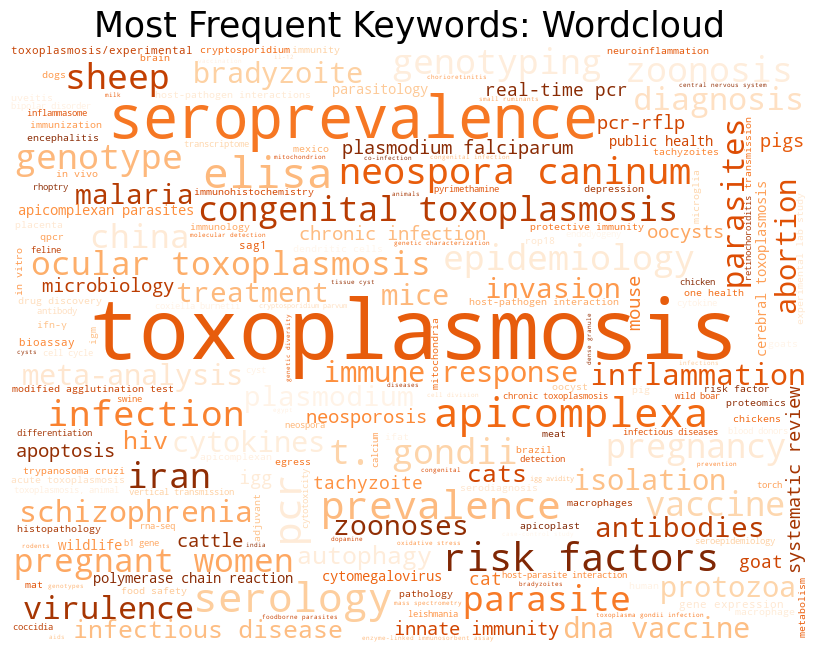

In [228]:
from wordcloud import WordCloud

# Create data
keywords = data['Keyword List'].explode()
keywords = keywords[keywords != 'toxoplasma gondii']
keywords = keywords[keywords != 'toxoplasma']
keywords = keywords.value_counts()
keywords_dict = keywords.to_dict()

# Create plot
wordcloud = WordCloud(width=800, height=600, background_color='white', colormap='Oranges')
wordcloud.generate_from_frequencies(keywords_dict)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Keywords: Wordcloud', fontsize=25)
plt.tight_layout(pad=0)
plt.show()

In [224]:
top_10

toxoplasmosis       904
seroprevalence      380
elisa               176
apicomplexa         158
serology            155
pcr                 147
prevalence          145
risk factors        140
neospora caninum    126
infection           116
epidemiology        108
sheep               107
genotype            107
genotyping          105
zoonosis            103
Name: Keyword List, dtype: int64

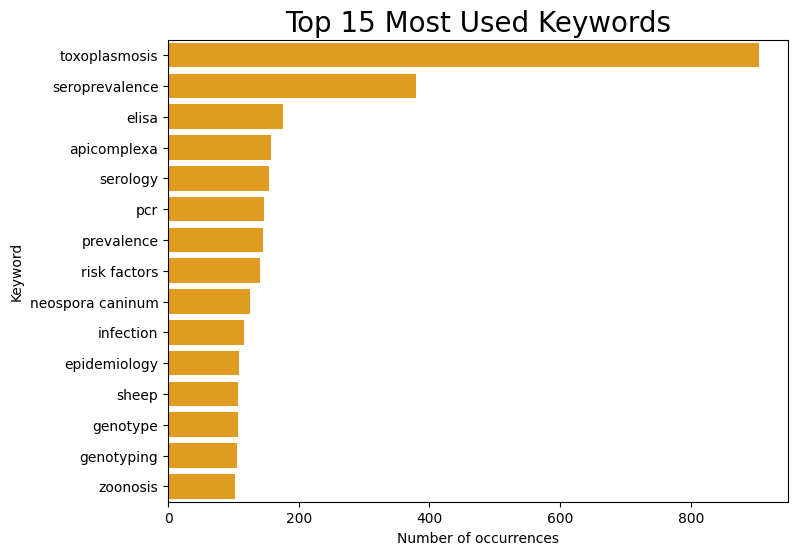

In [225]:
# Create plot
top_10 = keywords.head(15)
plt.figure(figsize=(8, 6), facecolor=None)
ax = sns.barplot(x=top_10.values, y=top_10.index, color='orange')
plt.title('Top 15 Most Used Keywords', fontsize=20)
ax.set(xlabel='Number of occurrences', ylabel='Keyword')
plt.show()

## Dates

### CompletedDate

In [7]:
data_CompletedDate = data[data['CompletedDate'].notna()]

In [9]:
days=pd.DataFrame(data_CompletedDate.groupby(['CompletedDate'],as_index=False).count())
days.head()

,CompletedDate,pubmed_id,Title,Keyword List,Journal Name,Journal ISO,Journal Country,Abstract,ArticleDate,RevisedDate,PublicationYear,Language,AuthorList,PublicationTypeList,PreprocessedAbstract
0,1965/11/20,1,1,1,1,1,1,0,0,1,1,1,1,1,1
1,1965/12/13,1,1,1,1,1,1,0,0,1,1,1,1,1,1
2,1965/12/17,1,1,1,1,1,1,0,0,1,1,1,1,1,1
3,1966/01/08,2,2,2,2,2,2,0,0,2,2,2,2,2,2
4,1966/01/15,1,1,1,1,1,1,0,0,1,1,1,1,1,1


In [10]:
from datetime import datetime

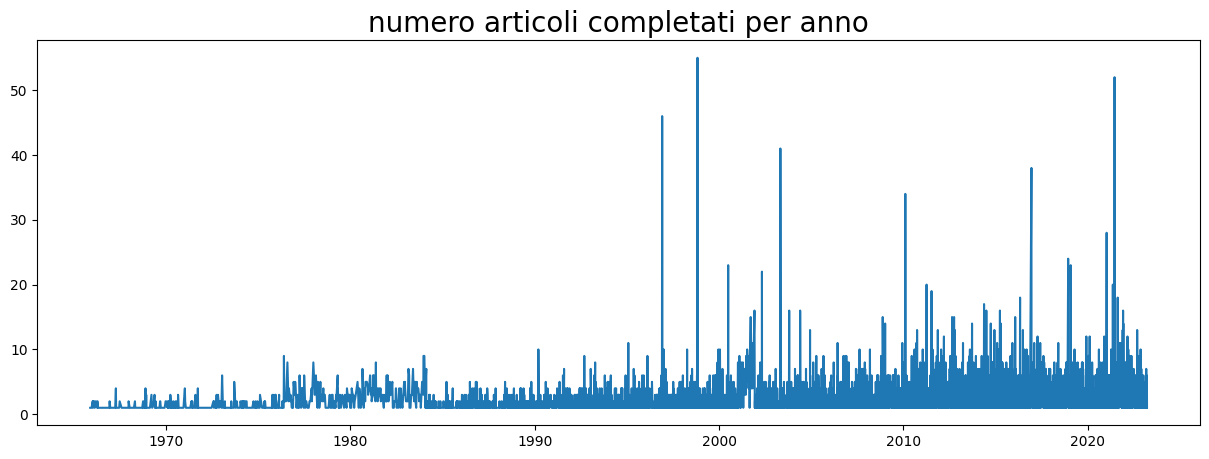

In [96]:
plt.figure(figsize=(15,5))
plt.plot([datetime.strptime(giorni['CompletedDate'][i], '%Y/%m/%d') for i in range(len(giorni))],
         giorni['pubmed_id'])
plt.title('numero articoli completati per anno', size = 20)
plt.show()

### ArticleDate

In [86]:
data_ArticleDate = data[data['ArticleDate'].notna()]

In [87]:
giorni=pd.DataFrame(data_ArticleDate.groupby(['ArticleDate'],as_index=False).count())
giorni.head()

,ArticleDate,pubmed_id,Title,Journal Country,Abstract,CompletedDate,RevisedDate,PublicationYear,Language,AuthorList,PublicationTypeList,PreprocessedAbstract
0,1999/01/01,1,1,1,1,1,1,1,1,1,1,1
1,2000/04/01,1,1,1,1,1,1,1,1,1,1,1
2,2000/06/05,1,1,1,1,1,1,1,1,1,1,1
3,2000/10/26,1,1,1,1,1,1,1,1,1,1,1
4,2000/10/30,1,1,1,1,1,1,1,1,1,1,1


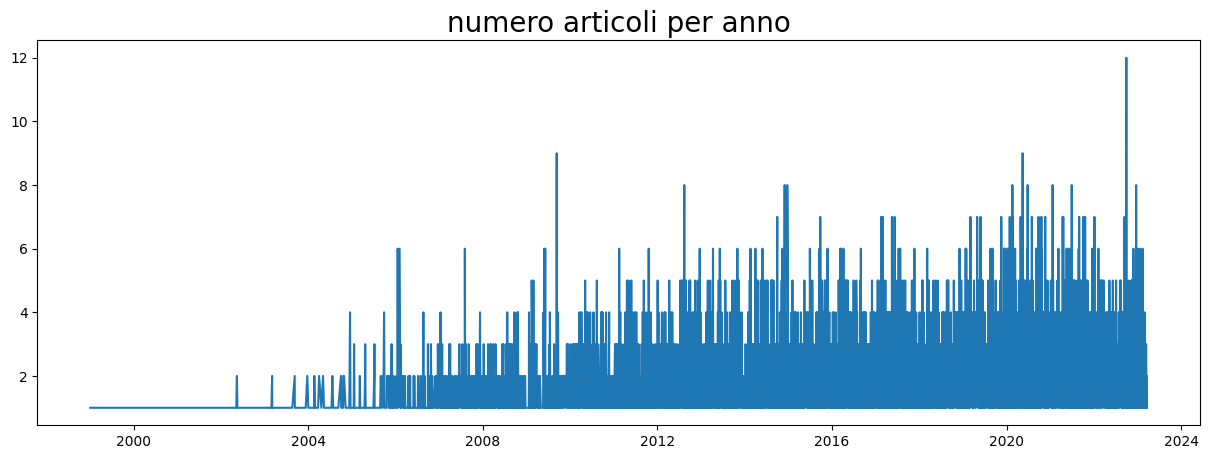

In [89]:
plt.figure(figsize=(15,5))
plt.plot([datetime.strptime(giorni['ArticleDate'][i], '%Y/%m/%d') for i in range(len(giorni))],
         giorni['pubmed_id'])
plt.title('numero articoli per anno', size = 20)
plt.show()

### RevisedDate

In [43]:
data_RevisedDate = data[data['RevisedDate'].notna()]

In [44]:
giorni=pd.DataFrame(data_RevisedDate.groupby(['RevisedDate'],as_index=False).count())
giorni.head()

,RevisedDate,pubmed_id,Title,Journal Country,Abstract,ArticleDate,CompletedDate,PublicationYear,Language,AuthorList,PublicationTypeList,PreprocessedAbstract
0,2000/12/18,9,9,9,1,0,9,9,9,9,9,1
1,2001/06/01,1,1,1,1,0,1,1,1,1,1,1
2,2003/02/05,1,1,1,0,0,1,1,1,1,1,0
3,2003/06/10,1,1,1,1,0,1,1,1,1,1,1
4,2003/11/14,225,225,225,143,0,225,225,225,225,225,143


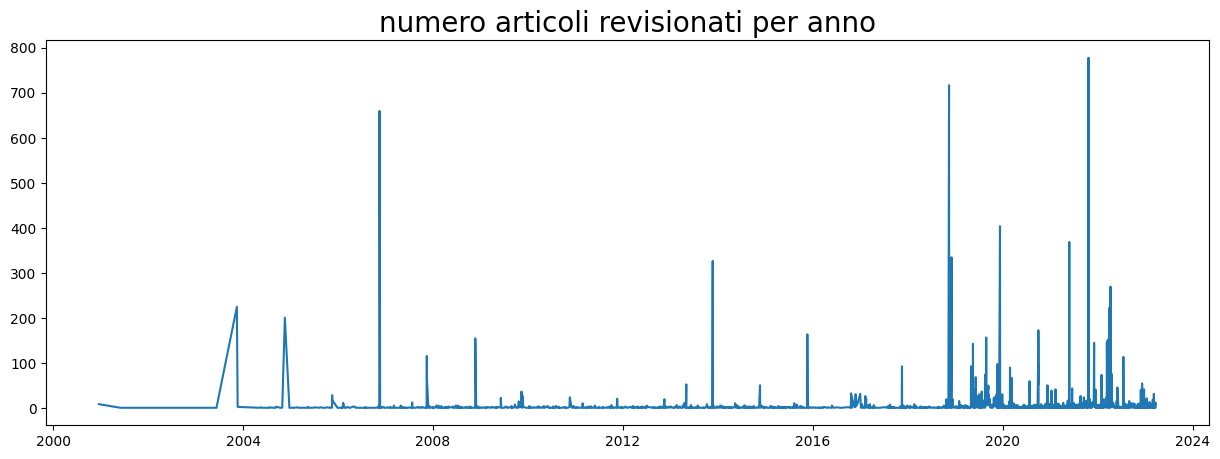

In [85]:
plt.figure(figsize=(15,5))
plt.plot([datetime.strptime(giorni['RevisedDate'][i], '%Y/%m/%d') for i in range(len(giorni))],
         giorni['pubmed_id'])
plt.title('numero articoli revisionati per anno', size = 20)
plt.show()

### Versione alternativa (istogramma con bin=trimetre)

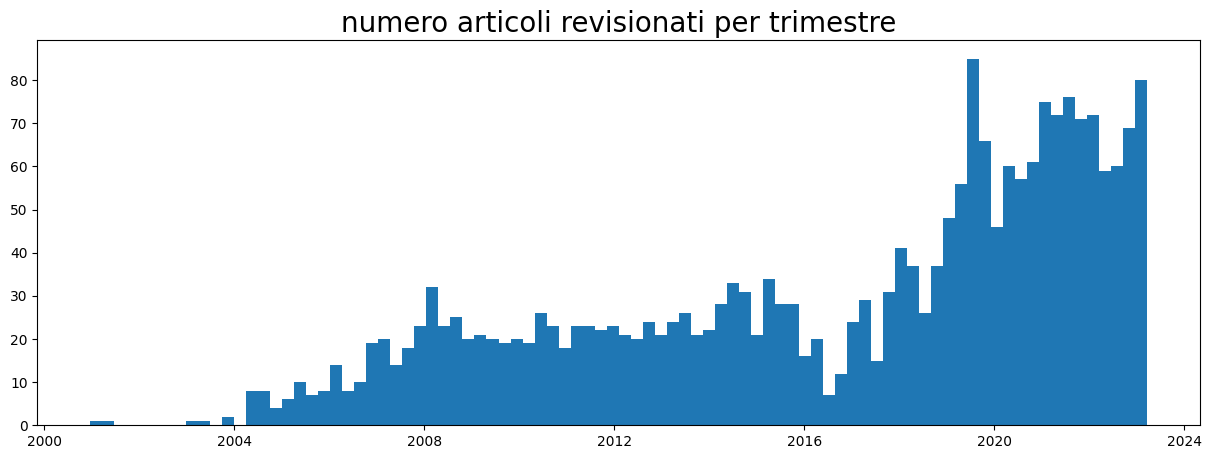

In [81]:
#[datetime.strptime(giorni['RevisedDate'][i], '%Y/%m/%d') for i in range(len(giorni))][-1]
#18/12/2000 - 22/3/2023 = 22 anni e 3 mesi = 264 mesi = 88 trimestri
plt.figure(figsize=(15,5))
plt.hist([datetime.strptime(giorni['RevisedDate'][i], '%Y/%m/%d') for i in range(len(giorni))],
         bins=88)
plt.title('numero articoli revisionati per trimestre', size = 20)
plt.show()

#Lìho fatta per RevisionDate, ma si può fare anche per CompletedDate e ArticleDate

In [67]:
[datetime.strptime(giorni['RevisedDate'][i], '%Y/%m/%d') for i in range(len(giorni))][-1]
18/12/2000 - 22/3/2023 = 22 anni e 3 mesi = 264 mesi = 132 bimestri

datetime.datetime(2023, 3, 22, 0, 0)

## States

In [52]:
stati=pd.DataFrame(data.groupby(['Journal Country'],as_index=False).count())
stati.head()

,Journal Country,pubmed_id,Title,Abstract,ArticleDate,CompletedDate,RevisedDate,PublicationYear,Language,AuthorList,PublicationTypeList,PreprocessedAbstract
0,Algeria,7,7,0,0,7,7,7,7,7,7,0
1,Argentina,12,12,9,0,12,12,12,12,12,12,9
2,Australia,82,82,72,21,81,82,82,82,82,82,72
3,Austria,24,24,21,11,18,24,24,24,24,24,21
4,Bangladesh,5,5,5,1,4,5,5,5,5,5,5


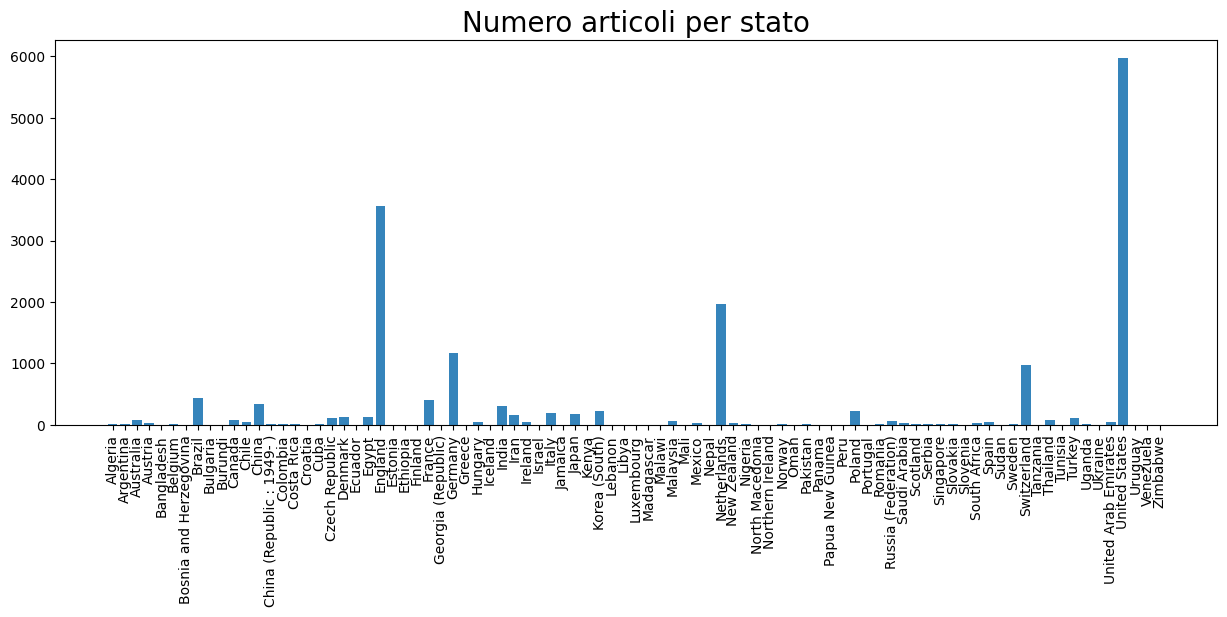

In [78]:
x_lab = stati['Journal Country']
y_val = stati['pubmed_id']
x_range = np.arange(len(x_lab))
plt.figure(figsize=(15,5))
plt.bar(x_range, y_val, align='center', alpha=0.9, )
plt.xticks(x_range, x_lab, rotation='vertical')
plt.title('Numero articoli per stato', size = 20)
plt.show()

In [116]:
top10 = stati.sort_values(by=['pubmed_id'], ascending=False).head(10)

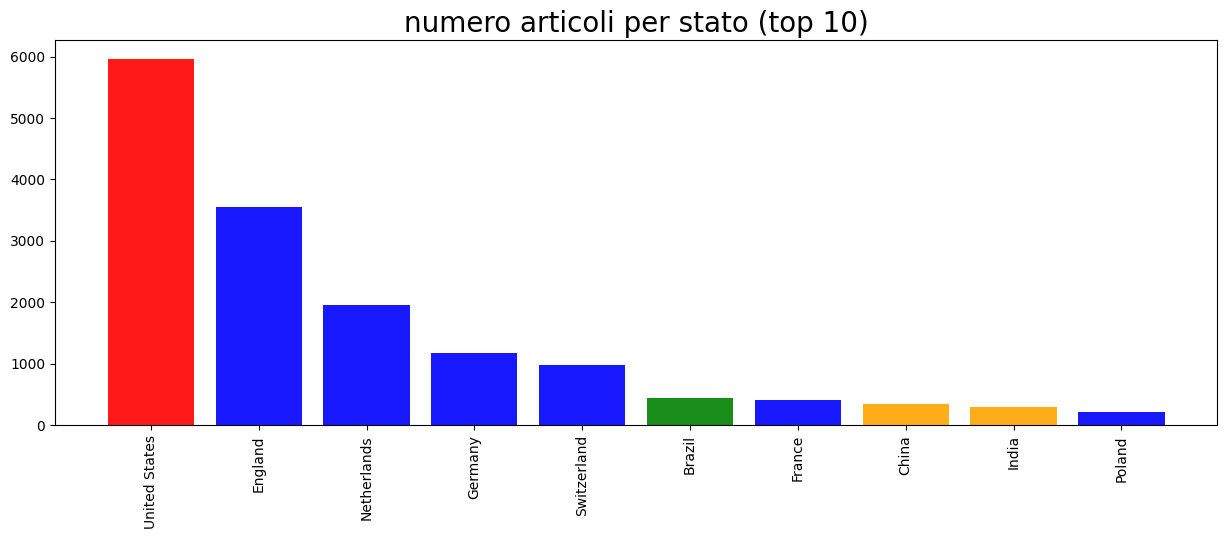

In [121]:
import pycountry_convert as pc

def country_to_continent(country_name):
    if country_name == 'England':
        return 'Europe'
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

top10['continent'] = top10['Journal Country'].apply(country_to_continent)
top10[['continent', 'Journal Country']].head(10)

def color_fun (state):
    if (country_to_continent(state) == 'Europe'):
        return 'blue'
    elif (country_to_continent(state) == 'Asia'):
        return 'orange'
    elif (country_to_continent(state) == 'Africa'):
        return 'brown'
    elif (country_to_continent(state) == 'North America'):
        return 'red'
    elif (country_to_continent(state) == 'South America'):
        return 'green'
    elif (country_to_continent(state) == 'Oceania'):
        return 'purple'
    
x_lab = top10['Journal Country']
y_val = top10['pubmed_id']
x_range = np.arange(len(x_lab))
plt.figure(figsize=(15,5))
plt.bar(x_range, y_val, align='center', alpha=0.9, color = [color_fun(x) for x in x_lab])
plt.xticks(x_range, x_lab, rotation='vertical')
plt.title('numero articoli per stato (top 10)', size = 20)
plt.show()

# TOPIC MODELLING

In [6]:
data.head()

,pubmed_id,Title,Journal Country,Abstract,ArticleDate,CompletedDate,RevisedDate,PublicationYear,Language,AuthorList,PublicationTypeList,PreprocessedAbstract
0,2605834,Acute acquired toxoplasmosis presenting as pol...,Japan,A 55-year-old Japanese male who developed acut...,NaN,1990/02/09,2006/11/15,1989.0,jpn,"['Yamada, T ', ' Nakagawa, Y ', ' Komiya, T ',...","['Case Reports ', ' English Abstract ', ' Jour...",a 55yearold japanese male who developed acute ...
1,23391103,Experimental vaginal infection of goats with s...,United States,The objective was to characterize the transmis...,2013/02/07,2013/10/22,2013/08/05,2013.0,eng,"['Wanderley, FS ', ' Porto, WJ ', ' Câmara, DR...","['Journal Article ', ' Randomized Controlled T...",the objective was to characterize the transmis...
2,23559345,Prevalence and risk factors for Toxoplasma gon...,Brazil,To determine the prevalence of immunoglobulin ...,NaN,2013/10/22,2019/03/25,2013.0,eng,"['Moura, FL ', ' Amendoeira, MR ', ' Bastos, O...","['Journal Article ', "" Research Support, Non-U...",to determine the prevalence of immunoglobulin ...
3,12685205,Fine needle aspiration cytologic diagnosis of ...,Switzerland,Fine needle aspiration (FNA) cytologic diagnos...,NaN,2003/05/30,2018/02/17,2003.0,eng,"['Pathan, SK ', ' Francis, IM ', ' Das, DK ', ...","['Case Reports ', ' Journal Article']",fine needle aspiration fna cytologic diagnosis...
4,28887145,Role of an estradiol regulatory factor-hydroxy...,England,Toxoplasma gondii is an apicomplexan parasite ...,2017/09/05,2017/11/13,2017/12/08,2017.0,eng,"['Zhang, X ', ' Liu, J ', ' Li, M ', ' Fu, Y '...","['Journal Article ', "" Research Support, Non-U...",toxoplasma gondii is an apicomplexan parasite ...


In [7]:
# Import the wordcloud library
from wordcloud import WordCloud

In [11]:
data2=data[data['PreprocessedAbstract'].notna()]
data2


,pubmed_id,Title,Journal Country,Abstract,ArticleDate,CompletedDate,RevisedDate,PublicationYear,Language,AuthorList,PublicationTypeList,PreprocessedAbstract
0,2605834,Acute acquired toxoplasmosis presenting as pol...,Japan,A 55-year-old Japanese male who developed acut...,NaN,1990/02/09,2006/11/15,1989.0,jpn,"['Yamada, T ', ' Nakagawa, Y ', ' Komiya, T ',...","['Case Reports ', ' English Abstract ', ' Jour...",a 55yearold japanese male who developed acute ...
1,23391103,Experimental vaginal infection of goats with s...,United States,The objective was to characterize the transmis...,2013/02/07,2013/10/22,2013/08/05,2013.0,eng,"['Wanderley, FS ', ' Porto, WJ ', ' Câmara, DR...","['Journal Article ', ' Randomized Controlled T...",the objective was to characterize the transmis...
2,23559345,Prevalence and risk factors for Toxoplasma gon...,Brazil,To determine the prevalence of immunoglobulin ...,NaN,2013/10/22,2019/03/25,2013.0,eng,"['Moura, FL ', ' Amendoeira, MR ', ' Bastos, O...","['Journal Article ', "" Research Support, Non-U...",to determine the prevalence of immunoglobulin ...
3,12685205,Fine needle aspiration cytologic diagnosis of ...,Switzerland,Fine needle aspiration (FNA) cytologic diagnos...,NaN,2003/05/30,2018/02/17,2003.0,eng,"['Pathan, SK ', ' Francis, IM ', ' Das, DK ', ...","['Case Reports ', ' Journal Article']",fine needle aspiration fna cytologic diagnosis...
4,28887145,Role of an estradiol regulatory factor-hydroxy...,England,Toxoplasma gondii is an apicomplexan parasite ...,2017/09/05,2017/11/13,2017/12/08,2017.0,eng,"['Zhang, X ', ' Liu, J ', ' Li, M ', ' Fu, Y '...","['Journal Article ', "" Research Support, Non-U...",toxoplasma gondii is an apicomplexan parasite ...
...,...,...,...,...,...,...,...,...,...,...,...,...
17625,17060514,In vitro inhibition of Toxoplasma gondii by fo...,United States,"Toxoplasmosis, caused by the protozoan Toxopla...",2006/10/23,2007/01/04,2021/09/15,2006.0,eng,"['Jones-Brando, L ', "" D'Angelo, J "", ' Posner...","['Evaluation Study ', ' Journal Article ', ' R...",toxoplasmosis caused by the protozoan toxoplas...
17626,3541487,Ultrasonic diagnosis of fetal ascites and toxo...,United States,The ultrasonic diagnosis of fetal ascites caus...,NaN,1987/02/19,2019/08/15,1986.0,eng,"['Blaakaer, J']","['Case Reports ', ' Journal Article']",the ultrasonic diagnosis of fetal ascites caus...
17627,1304722,Toxoplasma gondii pneumonitis in patients infe...,United States,Pulmonary toxoplasmosis is a rarely recognized...,NaN,1992/06/08,2004/11/17,1992.0,eng,"['Schnapp, LM ', ' Geaghan, SM ', ' Campagna, ...","['Case Reports ', ' Journal Article']",pulmonary toxoplasmosis is a rarely recognized...
17628,24250270,The value of routine polymerase chain reaction...,United States,To assess the value of routine polymerase chai...,2013/10/22,2014/06/23,2022/04/08,2013.0,eng,"['Scheepers, MA ', ' Lecuona, KA ', ' Rogers, ...",['Journal Article'],to assess the value of routine polymerase chai...


In [6]:
# Join the different processed titles together.
long_string = ' '.join(list(data2['PreprocessedAbstract'].values))
long_string

NameError: name 'dati2' is not defined

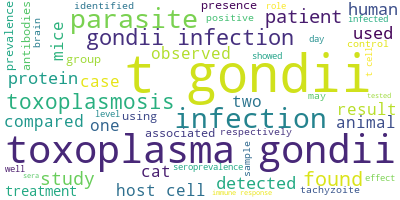

In [22]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

[0 1 2 3 4 5 6 7 8 9] [162272.0, 143470.0, 114837.0, 98831.0, 58013.0, 46775.0, 39629.0, 33608.0, 31323.0, 30799.0]


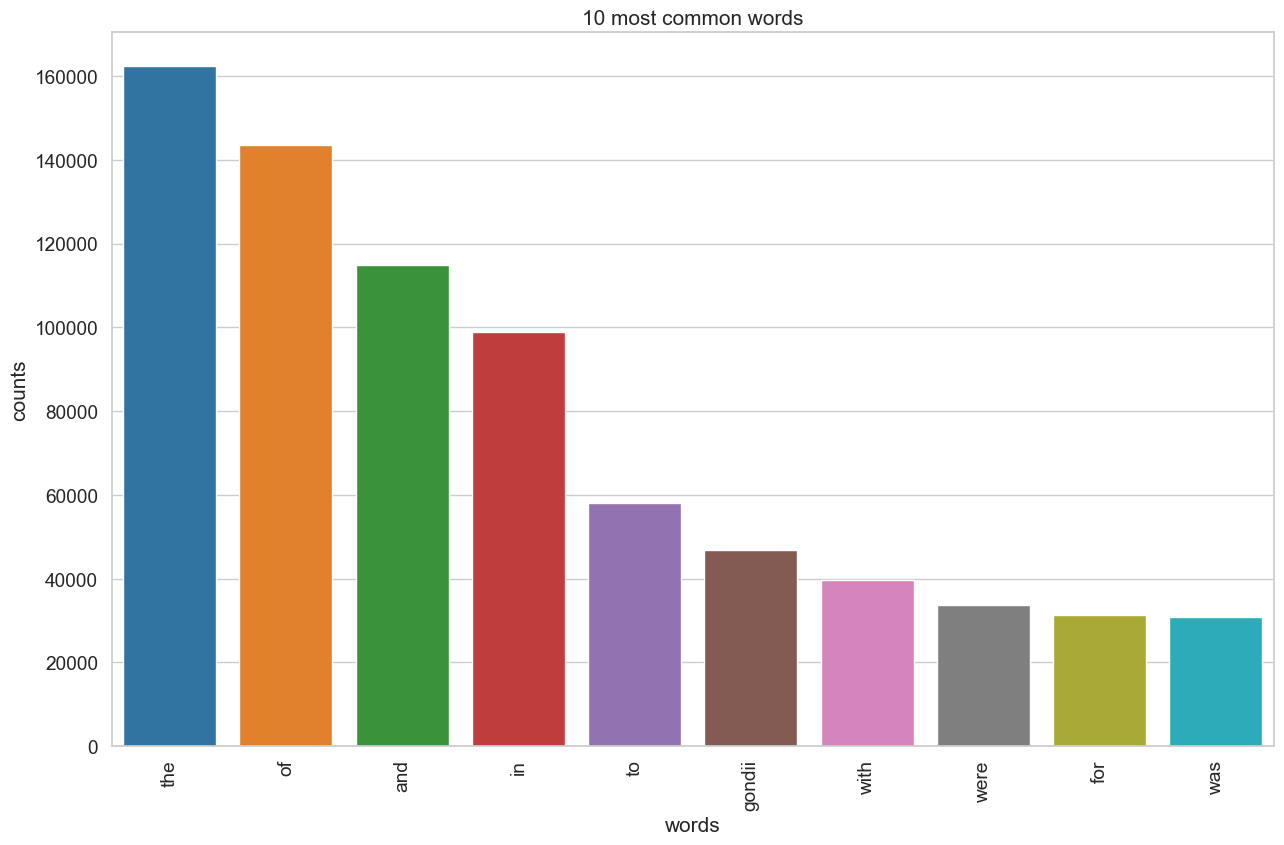

In [22]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))
    
    print(x_pos, counts)
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x = x_pos, y = counts)
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer()
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data2['PreprocessedAbstract'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

Evidentmente era wordcloud stesso a togliere le stop words (non era stato fatto in preprocessing). Perché quest'ultima visualizzazione sia più informativa devo rimuovere quelle comuni (come articoli e preposizioni)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import  word_tokenize 
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('punkt')

data2['token_text'] = data2['PreprocessedAbstract'].apply(word_tokenize)   


for ndoc in data2.index:                    
    data2['token_text'][ndoc]=[w for w in data2['token_text'][ndoc] if len(w)>2]
    data2['token_text'][ndoc]=[w for w in data2['token_text'][ndoc] if not w in stop_words]

In [34]:
def join_tokens(list):
    return ' '.join(list)

data2['PreprocessedAbstract2'] = data2['token_text'].apply(lambda x: join_tokens(x))

C:\Users\Emili\AppData\Local\Temp\ipykernel_14844\3067595059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati2['PreprocessedAbstract2'] = dati2['token_text'].apply(lambda x: join_tokens(x))


[0 1 2 3 4 5 6 7 8 9] [46775.0, 22553.0, 20183.0, 11308.0, 11232.0, 10790.0, 10033.0, 8954.0, 8332.0, 7373.0]


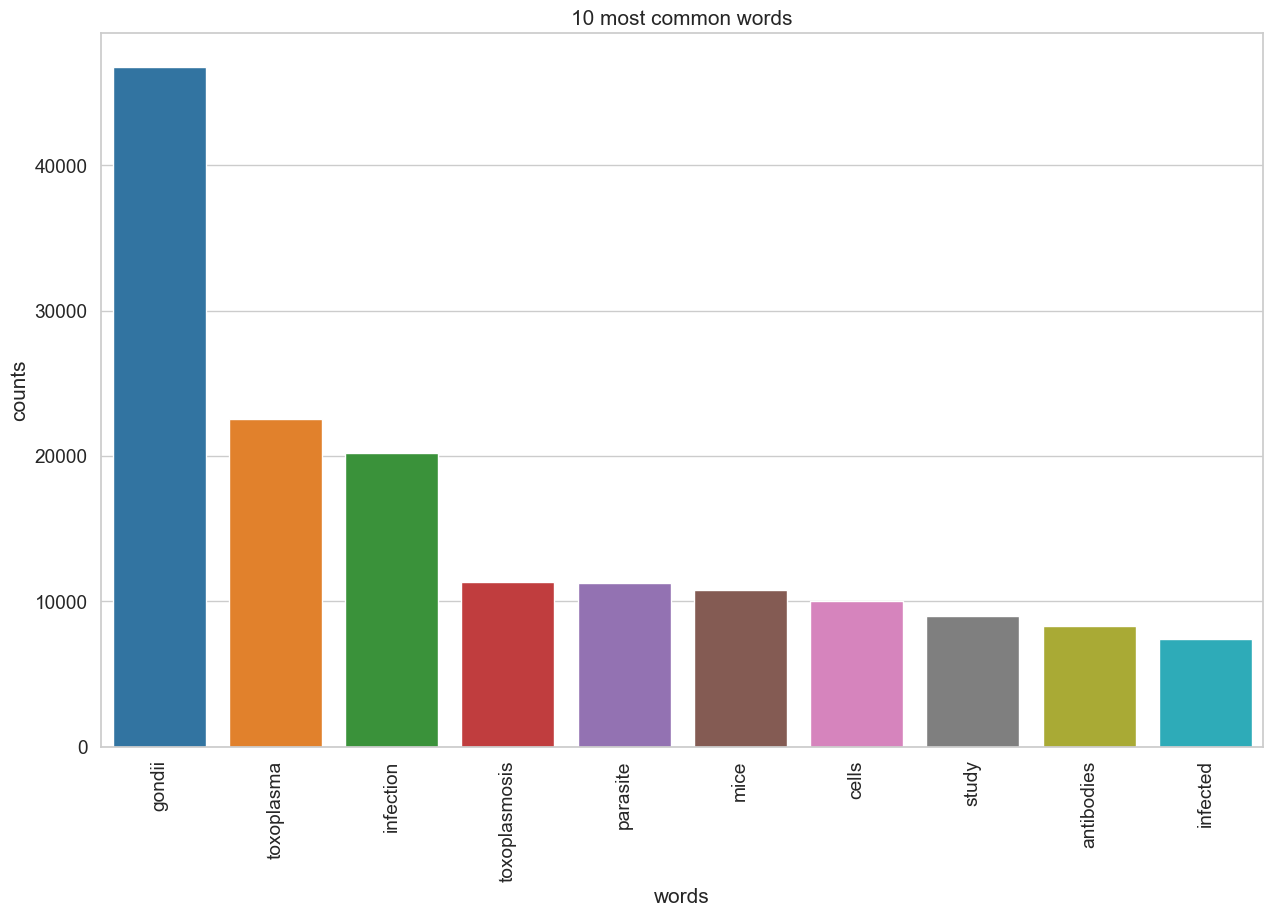

In [35]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer()
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data2['PreprocessedAbstract2'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

Si potrebbe fare altro preprocessing mettendo insieme parole con la stessa radice (come 'infection' e 'infected')

# Nucleotides

In [2]:
data=pd.read_csv("./Data/toxoplasma_gondii_nucleotide.csv")
data.drop(columns=['Unnamed: 0'], inplace=True)

C:\Users\giorg\AppData\Local\Temp\ipykernel_27492\2591967975.py:1: DtypeWarning: Columns (7,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("./Data/toxoplasma_gondii_nucleotide.csv")


In [3]:
data.head()

,GBSeq_locus,GBSeq_length,GBSeq_strandedness,GBSeq_create-date,GBSeq_update-date,GBSeq_definition,Submission Type,Sequencing Type,mol_type,isolation_source,host,country,collection_date
0,OQ402957,597,double,26-FEB-2023,26-FEB-2023,Toxoplasma gondii voucher W22_6329 Apico allel...,Direct Submission,##Assembly-Data-START## ; Sequencing Technolog...,genomic DNA,brain,Castor fiber,Switzerland,2022
1,OQ402956,597,double,26-FEB-2023,26-FEB-2023,Toxoplasma gondii voucher W22_6002 Apico allel...,Direct Submission,##Assembly-Data-START## ; Sequencing Technolog...,genomic DNA,brain,Castor fiber,Switzerland,2022
2,OQ402955,597,double,26-FEB-2023,26-FEB-2023,Toxoplasma gondii voucher W21_2282 Apico allel...,Direct Submission,##Assembly-Data-START## ; Sequencing Technolog...,genomic DNA,brain,Castor fiber,Switzerland,2021
3,OQ402954,597,double,26-FEB-2023,26-FEB-2023,Toxoplasma gondii voucher W21_1498 Apico allel...,Direct Submission,##Assembly-Data-START## ; Sequencing Technolog...,genomic DNA,brain,Castor fiber,Switzerland,2021
4,OQ402953,597,double,26-FEB-2023,26-FEB-2023,Toxoplasma gondii voucher W21_1294 Apico allel...,Direct Submission,##Assembly-Data-START## ; Sequencing Technolog...,genomic DNA,brain,Castor fiber,Switzerland,2021


In [4]:
data.dtypes

GBSeq_locus           object
GBSeq_length           int64
GBSeq_strandedness    object
GBSeq_create-date     object
GBSeq_update-date     object
GBSeq_definition      object
Submission Type       object
Sequencing Type       object
mol_type              object
isolation_source      object
host                  object
country               object
collection_date       object
dtype: object

## Sequences

In [5]:
data.shape

(189981, 13)

## collection_date

In [6]:
import datetime as dt
data['Creation Year'] = pd.to_datetime(data['GBSeq_create-date']).dt.year

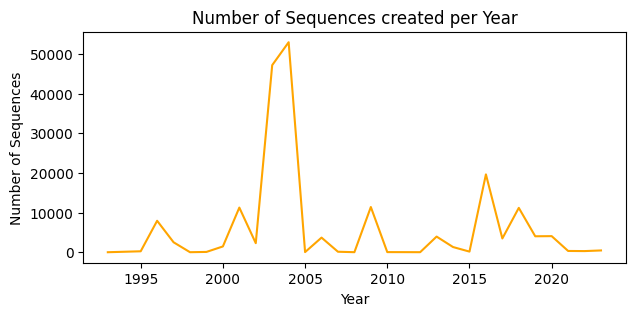

In [114]:
year_counts = data['Creation Year'].value_counts().sort_index()

# Crea il lineplot
plt.figure(figsize=(7, 3), facecolor=None)
ax = sns.lineplot(x=year_counts.index, y=year_counts.values, color='orange')

# Aggiungi titoli agli assi e al grafico
plt.title(f'Number of Sequences created per Year')
ax.set(xlabel='Year', ylabel='Number of Sequences')

# Mostra il grafico
plt.show()

## Collection Year and Sequences Lenght

In [18]:
min(data['GBSeq_length'])
max(data['GBSeq_length'])
np.mean(data['GBSeq_length'])
np.median(data['GBSeq_length'])

534.0

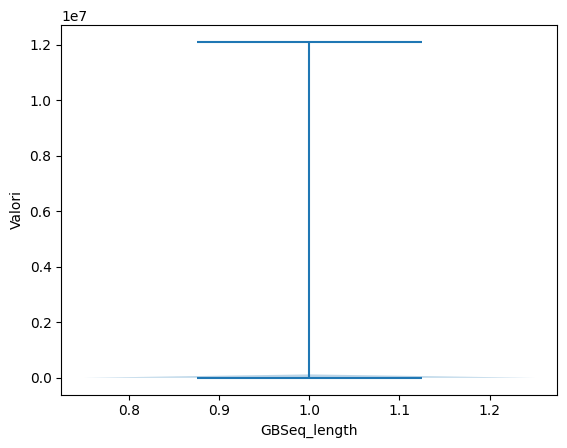

In [12]:
plt.violinplot(data['GBSeq_length'])

# Aggiungi le etichette degli assi
plt.xlabel('GBSeq_length')
plt.ylabel('Valori')

# Mostra il grafico
plt.show()

In [11]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="GBSeq_length", data=data)

In [ ]:
sns.histplot(data=data, x="GBSeq_length")

# Show the plot
sns.show()

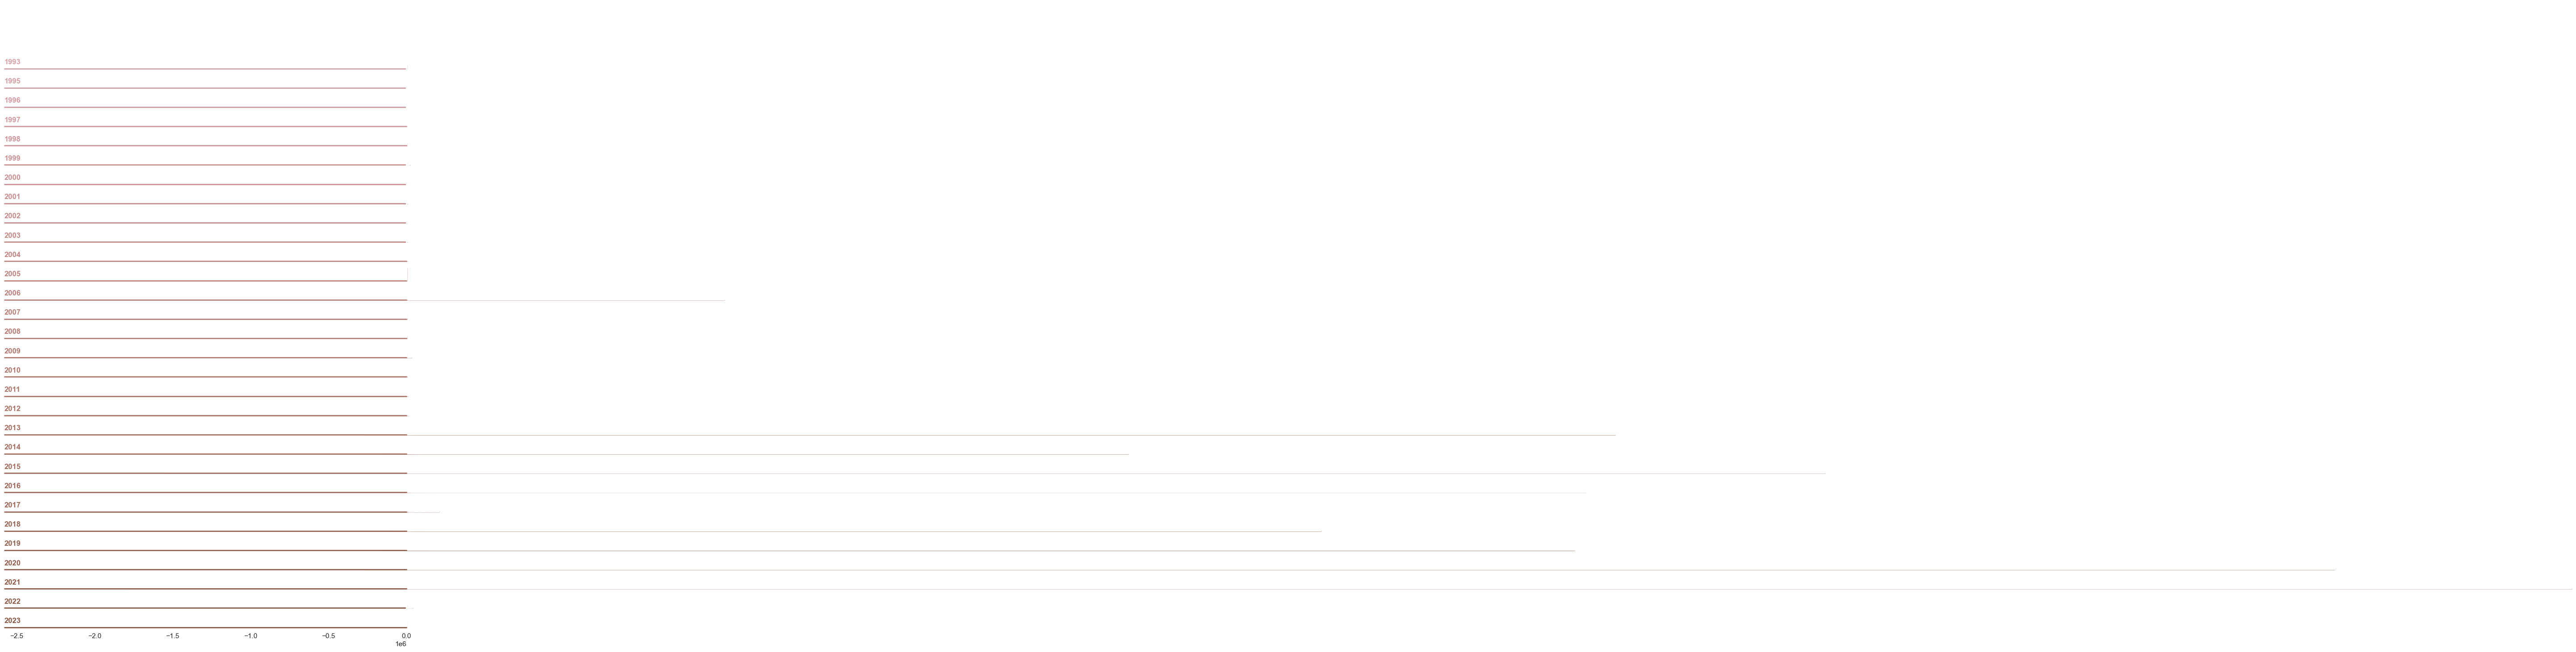

In [24]:
# Set the theme and make the axis background transparent
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(len(data["Creation Year"].unique()), start=1.4, rot=-.25, light=.7, dark=.4)

# Create a FacetGrid with the data frame and the field's name to group the values
g = sns.FacetGrid(data, row="Creation Year", hue="Creation Year", aspect=20, height=0.5, palette=pal)

g.map(sns.kdeplot, "GBSeq_length", bw_adjust=.6, cut=5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "GBSeq_length", bw_adjust=.6, cut=5, clip_on=False, color="w", lw=2)
g.map(plt.axhline, y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .1, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Creation Year")
g.fig.subplots_adjust(hspace=-.7)
g.set(yticks=[], xlabel="", ylabel="", xlim=(None, 680), title="")
g.despine(bottom=True, left=True)
plt.show()

# # Set an orange color palette for the hue variable
# g.set_palette("Oranges")

# # Remove y-ticks and left spine
# g.set(yticks=[])
# g.despine(left=True)

# # Adjust the height space between the plots
# g.fig.subplots_adjust(hspace=-.5)

# plt.show()

## Country

In [98]:
country_counts = data['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']
l = country_counts['country']
ser = pd.Series(l)
correction = ser.str.extractall('(\w*\s*\w*)(:)(.*)').reset_index(level=[1])[0]
ser[correction.index] = correction
diz = {'Viet Nam':'Vietnam',
      'USA':'United States',
      'Slovakia': 'Slovak Republic'}
ser = ser.replace(diz)
country_counts['country'] = ser
country_counts_grouped = country_counts.groupby('country', as_index=False)['count'].sum()
country_counts_grouped = country_counts_grouped.sort_values('count', ascending=False)

In [85]:
country_counts_grouped.head()

,country,count
47,United States of America,11088
6,China,6552
4,Brazil,5848
5,Canada,3253
12,France,1195


In [83]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Rinomina la colonna 'name' in 'country'
world = world.rename(columns={'name': 'country'})
print(world['country'].unique())

['Fiji' 'Tanzania' 'W. Sahara' 'Canada' 'United States of America'
 'Kazakhstan' 'Uzbekistan' 'Papua New Guinea' 'Indonesia' 'Argentina'
 'Chile' 'Dem. Rep. Congo' 'Somalia' 'Kenya' 'Sudan' 'Chad' 'Haiti'
 'Dominican Rep.' 'Russia' 'Bahamas' 'Falkland Is.' 'Norway' 'Greenland'
 'Fr. S. Antarctic Lands' 'Timor-Leste' 'South Africa' 'Lesotho' 'Mexico'
 'Uruguay' 'Brazil' 'Bolivia' 'Peru' 'Colombia' 'Panama' 'Costa Rica'
 'Nicaragua' 'Honduras' 'El Salvador' 'Guatemala' 'Belize' 'Venezuela'
 'Guyana' 'Suriname' 'France' 'Ecuador' 'Puerto Rico' 'Jamaica' 'Cuba'
 'Zimbabwe' 'Botswana' 'Namibia' 'Senegal' 'Mali' 'Mauritania' 'Benin'
 'Niger' 'Nigeria' 'Cameroon' 'Togo' 'Ghana' "Côte d'Ivoire" 'Guinea'
 'Guinea-Bissau' 'Liberia' 'Sierra Leone' 'Burkina Faso'
 'Central African Rep.' 'Congo' 'Gabon' 'Eq. Guinea' 'Zambia' 'Malawi'
 'Mozambique' 'eSwatini' 'Angola' 'Burundi' 'Israel' 'Lebanon'
 'Madagascar' 'Palestine' 'Gambia' 'Tunisia' 'Algeria' 'Jordan'
 'United Arab Emirates' 'Qatar' 'Kuwait'

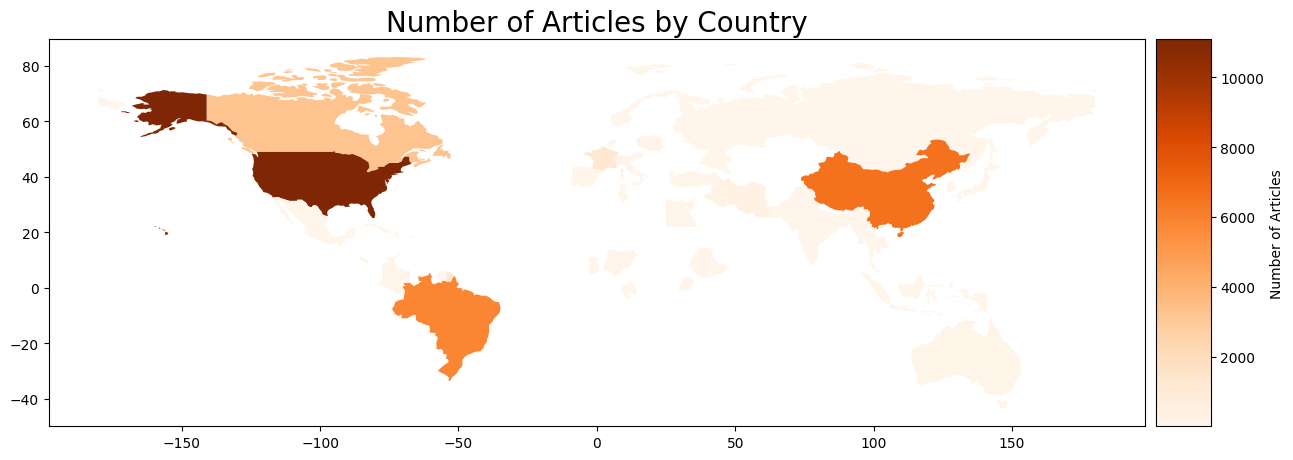

In [97]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Carica il file shapefile del mondo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Rinomina la colonna 'name' in 'country'
world = world.rename(columns={'name': 'country'})

# Aggiungi il conteggio delle istanze al dataframe del mondo
world = world.merge(country_counts_grouped, left_on='country', right_on = 'country', how='left')

# Crea il cloropleto
fig, ax = plt.subplots(figsize=(15, 15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(column='count', cmap='Oranges', ax=ax, legend=True, cax=cax,
               legend_kwds={'label': 'Number of Created Sequences', 'orientation': 'vertical'})
ax.set_title('Number of Articles by Country', fontsize=20)
plt.show()

In [103]:
px.choropleth(country_counts_grouped, locations='country', color='count',
                    locationmode='country names', color_continuous_scale='Oranges',
                    title='Number of Articles by Country',
                    labels={'count':'Sequences Count'}) 
fig.show()

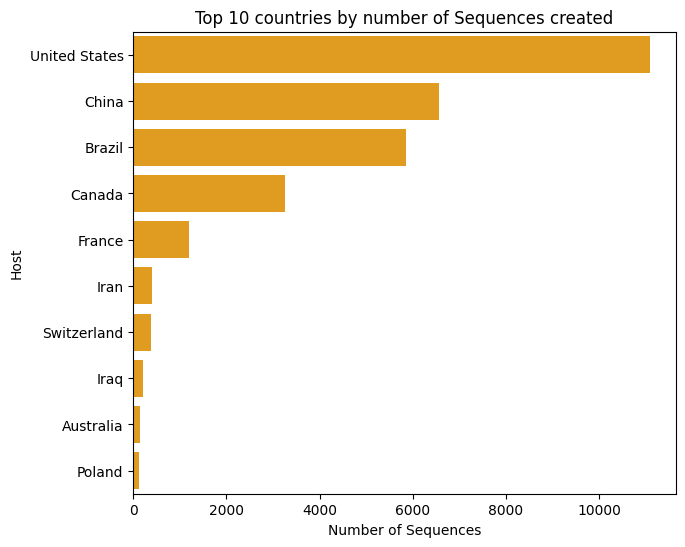

In [120]:
# Create plot
country_counts_grouped_top = country_counts_grouped.head(10)
plt.figure(figsize=(7, 6), facecolor=None)
ax = sns.barplot(x='count', y='country', data=country_counts_grouped_top, color='orange')
plt.title(f'Top 10 countries by number of Sequences created')
ax.set(xlabel='Number of Sequences', ylabel='Host')
plt.show()

## Hosts

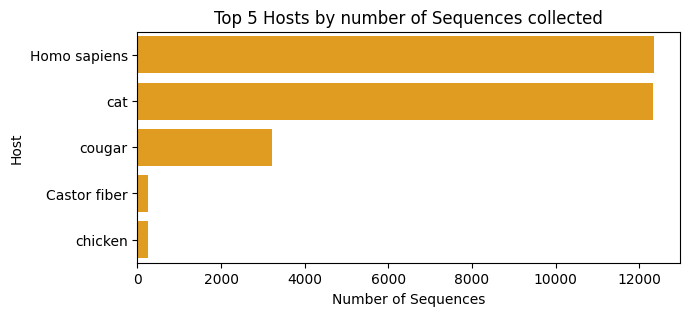

In [123]:
grouped_data_c = data.groupby(['host']).size().reset_index(name='nSequences')
top_10_c = grouped_data_c.nlargest(5, 'nSequences')

# Create plot
plt.figure(figsize=(7, 3), facecolor=None)
ax = sns.barplot(x='nSequences', y='host', data=top_10_c, color='orange')
plt.title(f'Top 5 Hosts by number of Sequences collected')
ax.set(xlabel='Number of Sequences', ylabel='Host')
plt.show()

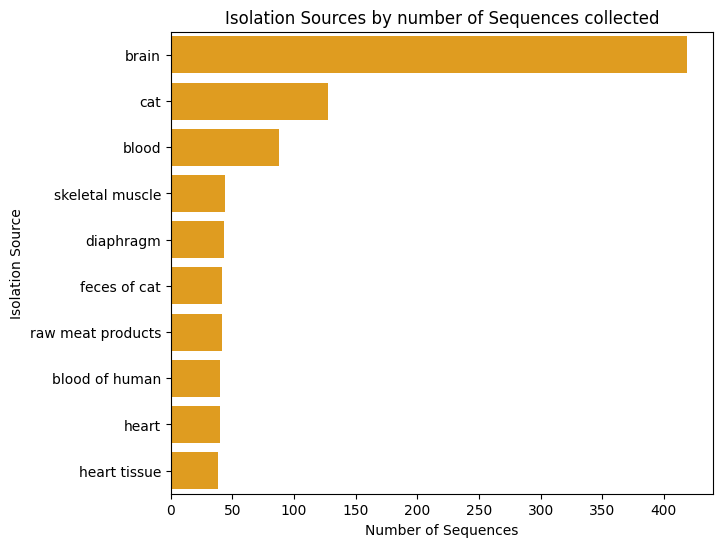

In [112]:
grouped_data_c = data.groupby(['isolation_source']).size().reset_index(name='nSequences')
top_10_c = grouped_data_c.nlargest(10, 'nSequences')

# Create plot
plt.figure(figsize=(7, 6), facecolor=None)
ax = sns.barplot(x='nSequences', y='isolation_source', data=top_10_c, color='orange')
plt.title(f'Isolation Sources by number of Sequences collected')
ax.set(xlabel='Number of Sequences', ylabel='Isolation Source')
plt.show()

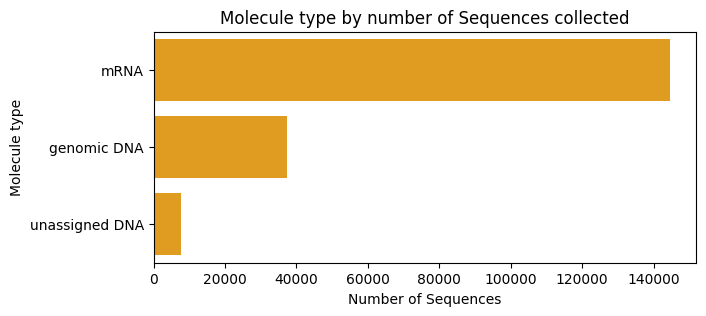

In [122]:
grouped_data_c = data.groupby(['mol_type']).size().reset_index(name='nSequences')
top_10_c = grouped_data_c.nlargest(3, 'nSequences')

# Create plot
plt.figure(figsize=(7, 3), facecolor=None)
ax = sns.barplot(x='nSequences', y='mol_type', data=top_10_c, color='orange')
plt.title(f'Molecule type by number of Sequences collected')
ax.set(xlabel='Number of Sequences', ylabel='Molecule type')
plt.show()
